# F98 SQUIDs and Noise Thermometers


## I. Vorbereitungen

Vor der Durchführung des Experiments haben wir verschiedene Widerstände mithilfe eines Multimeters sowohl vor als auch nach der Abkühlung gemessen. Es konnte beobachtet werden, dass die elektrischen Widerstände unterhalb der kritischen Temperatur deutlich gesunken sind, was den Eigenschaften von Supraleitern entspricht. Theoretisch sollten die Widerstände vollständig verschwinden, doch in der Praxis bleibt ein Restwiderstand bestehen, da einige Kabel weiterhin Widerstände aufweisen, die sie bei Raumtemperatur besitzen.

## II: single stage
### 2.1 Open SQUID-Loop

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scienceplots

a= 0.01673933913405291 +- 1.4515836642106036e-10 [mV/ms]
Widerstand SQUID: 1.8677295293730372 Ω


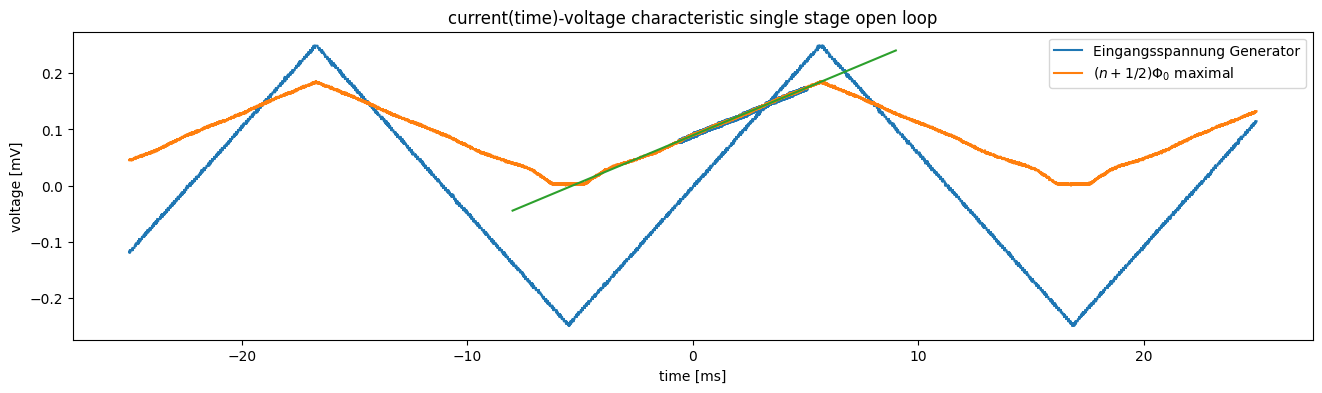

In [2]:
def linear(x,a,b):
    return a*x+b

# CSV. file readinga
max1=pd.read_csv('max1_100_2.csv', skiprows=3, delimiter=';', usecols=[0,1,2], names=['time', 'A', 'B'])
max1['time'] = max1['time'].str.replace(',', '.').astype(float)
max1['B'] = max1['B'].str.replace(',', '.').astype(float)
max1['A'] = max1['A'].str.replace(',', '.').astype(float)
#print(max1)
time = pd.to_numeric(max1["time"], errors='coerce')    # in AMP Modul amplification=2000
voltage_A =pd.to_numeric(max1["A"], errors='coerce')/2000*1000
voltage_B =pd.to_numeric(max1["B"], errors='coerce')/2000  # in V

# plot time-voltage characteristics in oszilloscop
plt.figure(figsize=(16,4))
plt.plot(time, voltage_A, label='Eingangsspannung Generator')
plt.plot(time, voltage_B, label='$(n+1/2)\\Phi_0$ maximal')
plt.ylabel('voltage [mV]')
plt.xlabel('time [ms]')

plt.title('current(time)-voltage characteristic single stage open loop')
plt.legend()

# Auswahl des linearen Bereichs
time_linear=[]
B_linear=[]
for i in range(len(time)):
    if time[i]<-0.6 or time[i]>5:
        continue
    time_linear.append(time[i])
    B_linear.append(voltage_B[i])

plt.scatter(time_linear,B_linear, s=4)

popt, pcov=curve_fit(linear, time_linear, B_linear)
t_range=np.linspace(-8,9,100)
plt.plot(t_range, linear(t_range,*popt),label='linear Fit')
print('a=', popt[0],'+-', pcov[0][0],'[mV/ms]')

# convert time to A
peak_to_peak=100   # uA
f=44.812           # Hz
T=1/f*1000         # ms
factor=(T/2)/peak_to_peak   # ms/uA
R=(popt[0]*factor*10**3)
print('Widerstand SQUID:', R,'Ω')

# Hier liegt beim Minimum der Dreiecks-generatorspannung ein Storm von 0 und beim Maximum ein Strom von 100uA an (das heißt der lineare Teil wird vermutlich irgendwo zwischen 20uA und 100uA sein). Die Frequenz wird für die Berechnugn des Widerstands gar nicht benötigt da dieser dann direkt über R=U/I berechnet werden kann 

### Den linearen Bereich habe ich noch mal angepasst. Die Frequenz haben wir benutzt um die Zeit-Skalar in den Strom umzuwandeln, da es in Oszilloskop Data nur Zeit gibt, nicht Strom. Für dieses Problem habe ich dir damals gefragt und du sagst dass wir einen Zeit-Strom Faktor mithilfe von der Periode und Peak-to-Peak bestimmen sollen:)

Wir können auch sehen dass der Fehler extrem klein ist, weshalb im Folgenden wird der Fehler einfach vernachlässigt.

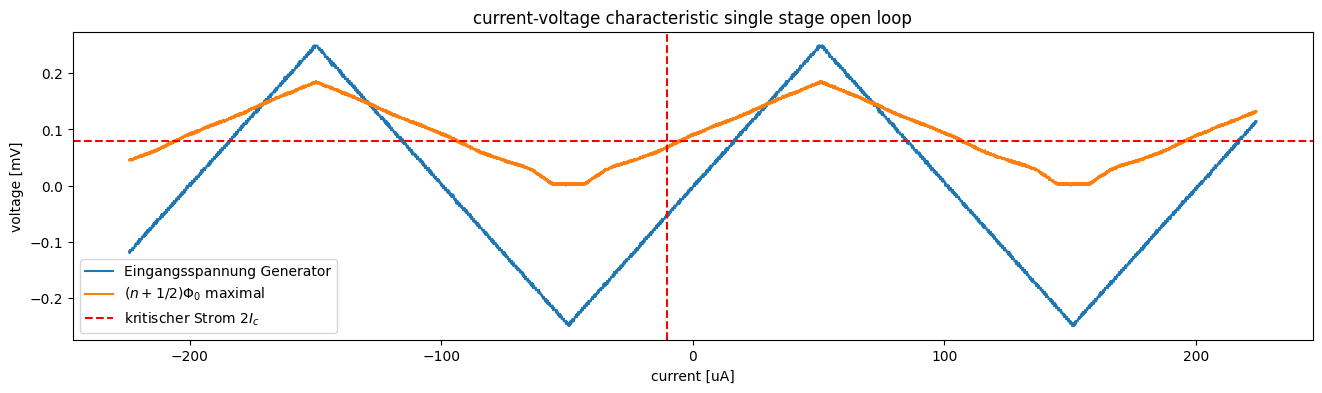

In [3]:
current=time/factor   # uA
plt.figure(figsize=(16,4))
plt.plot(current, voltage_A, label='Eingangsspannung Generator')
plt.plot(current, voltage_B, label='$(n+1/2)\\Phi_0$ maximal')
plt.ylabel('voltage [mV]')
plt.xlabel('current [uA]')

# Endpunkte von Platau ablesen
plt.axhline(y=np.min(B_linear), color='red', linestyle='--')    # kritischer Strom an Position des linearen Bereichsanfang
#zero_B = np.where(np.diff(np.sign(voltage_B)))[0]  # Nullstellen-Indexe
#x_zero_B = current[zero_B]
#print(x_zero_B)
plt.axvline(x=-10.5, color='red', linestyle='--', label='kritischer Strom $2I_c$')

plt.title('current-voltage characteristic single stage open loop')
plt.legend()

# Hier sollte die minimale current auch im Minima der Sägezahnfunktion liegen eure kritische Stromstärke ist dann auch eher um die 10uA

Wird eine Eingangsspannung auf single-stage open SQUID Loop angelegt, wird anhand der Eigenschaften der Josephson junction eine Strom-Voltage Charakteristik erzeugt. Unter extrem niedrigen Temperatur für $I<I_0$ sind keine Cooper-Pairs gebrochen, die sich wie Bosons in Grundzustand verhält und schon in günstigsten Energiezustand befindet, weshalb es keinen Widerstand gibt (da keine thermische Streuung, und graphisch abgelsen ein Platau). Jedoch über $I_0$ liefert die externe Stromquelle (elektrischer Strom) genügend Energie, um Cooper-Paare aufzubrechen. Abgesehen von Voltage-current Characteristics ist dann eine Spannung zu beobachten, die später linear in Strom ansteigt und die Kontaktstelle sich einem normalleitenden Widerstand ähnelt (ab kritischem Strom $2I_c$). Ausgewertet in linearem Bereich wie oben lässt sich der Widerstand des SQUIDs bestimmen, während der kritische Strom $I_C$ aus dem Beginn des linearen Bereichs ausgewertet werden kann: $I_c=(10.5\pm1.5)\;\mu A$

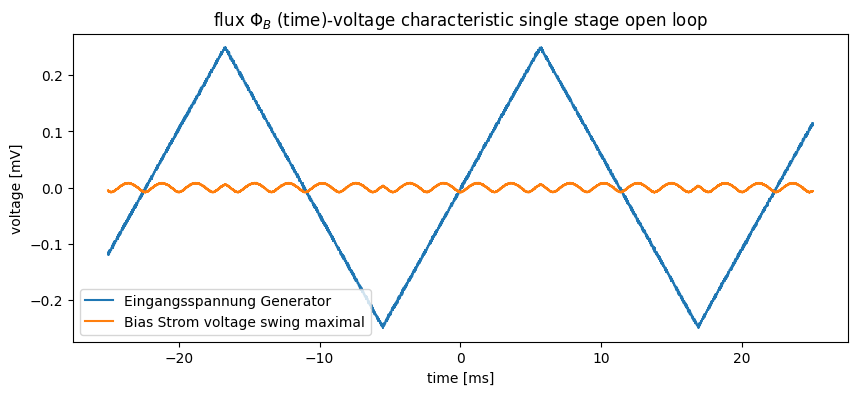

In [4]:
# CSV. file readinga
factor=(T/2)/200
phiB=pd.read_csv('Phi_b_PeakToPeak_1.csv', skiprows=3, delimiter=';', usecols=[0,1,2], names=['time', 'A', 'B'])
phiB['time'] = phiB['time'].str.replace(',', '.').astype(float)
phiB['B'] = phiB['B'].str.replace(',', '.').astype(float)
phiB['A'] = phiB['A'].str.replace(',', '.').astype(float)
# print(phiB)
time1 = pd.to_numeric(phiB["time"], errors='coerce')
voltage_A1 =pd.to_numeric(phiB["A"], errors='coerce')/2000*1000
voltage_B1 =pd.to_numeric(phiB["B"], errors='coerce')/2000  # in mV

# plot time-voltage characteristics in oszilloscop
plt.figure(figsize=(10,4))
plt.plot(time1, voltage_A1, label='Eingangsspannung Generator')
plt.plot(time1, voltage_B1, label='Bias Strom voltage swing maximal')
plt.ylabel('voltage [mV]')
plt.xlabel('time [ms]')

plt.title('flux $\\Phi_B$ (time)-voltage characteristic single stage open loop')
plt.legend()

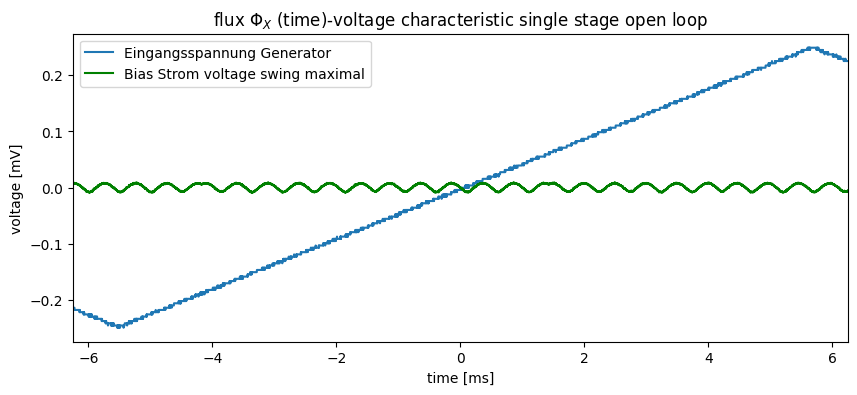

In [5]:
# CSV. file readinga
phiB=pd.read_csv('PhiX_PeakToPeak_2.csv', skiprows=3, delimiter=';', usecols=[0,1,2], names=['time', 'A', 'B'])
phiB['time'] = phiB['time'].str.replace(',', '.').astype(float)
phiB['B'] = phiB['B'].str.replace(',', '.').astype(float)
phiB['A'] = phiB['A'].str.replace(',', '.').astype(float)
# print(phiB)
time2 = pd.to_numeric(phiB["time"], errors='coerce')
time_phiX=time2/4  # Frequency base Einatellung
voltage_A2 =pd.to_numeric(phiB["A"], errors='coerce')/2000*1000
voltage_B2 =pd.to_numeric(phiB["B"], errors='coerce')/2000   # in mV

# plot time-voltage characteristics in oszilloscop
plt.figure(figsize=(10,4))
plt.plot(time2, voltage_A2, label='Eingangsspannung Generator')
plt.plot(time_phiX, voltage_B2, label='Bias Strom voltage swing maximal',color='green')
plt.ylabel('voltage [mV]')
plt.xlabel('time [ms]')
plt.xlim(np.min(time_phiX), np.max(time_phiX))

plt.title('flux $\\Phi_X$ (time)-voltage characteristic single stage open loop')
plt.legend()

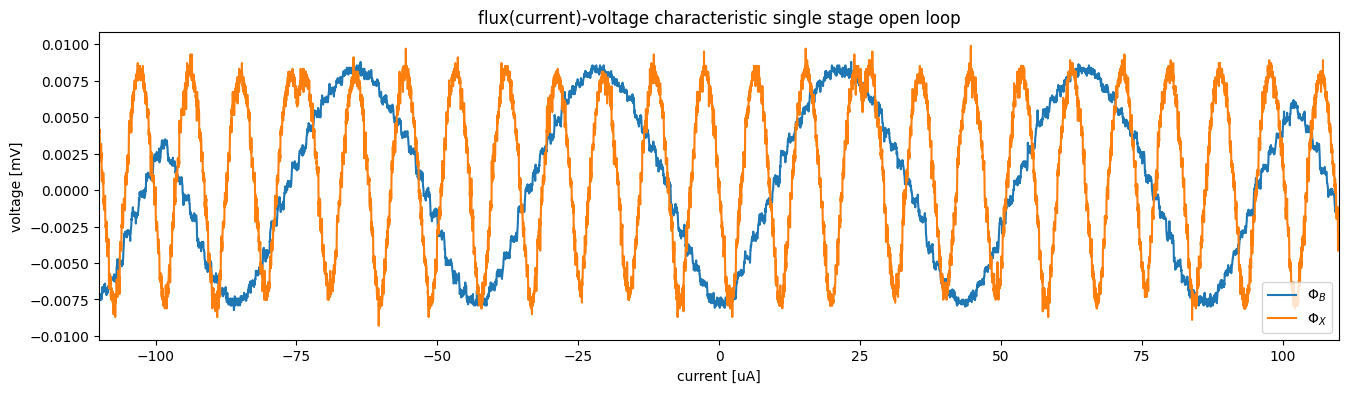

In [6]:
current=time1/factor
current_phiX=time_phiX/factor
plt.figure(figsize=(16,4))
plt.plot(current, voltage_B1,label='$\\Phi_B$')
plt.plot(current_phiX, voltage_B2, label='$\\Phi_X$')
plt.ylabel('voltage [mV]')
plt.xlabel('current [uA]')
plt.xlim(-110,110)

plt.title('flux(current)-voltage characteristic single stage open loop')
plt.legend()

Es ist immer wichtig zu sehen, dass es eine Phasenverschibung zwischen den beiden Flux-Spannung Charakteristik gibt, wegen der verschiedener Induktivität oder anderer Feedback-Fähigkeit der 2 Loops. Der Rückkopplungskreis kann potenziell zu langsam sein, um die Flusskompensation bei einer schnellen und großen Flussänderung zu regeln. Dies kann zu einem Sprung des Arbeitspunkts um mehrere ganzzahlige Flussquanten in der Fluss-Spannungs-Charakteristik führen und somit ein abgeschnittenes Ausgangssignal zur Folge haben.

##### Bestimmung der Magnetisierung der verschiedenen Loops

Wenn der Eingabestrom größer als der kritische Strom $I_c$ ist, arbeitet der SQUID immer im widerstandsbehafteten Modus. In diesem Fall ist die Spannung eine Funktion des angelegten Magnetfeldes und hat eine Periode, die gleich einem Flussquantum $\Phi_0$ ist. Da die Strom-Spannungs-Charakteristik des DC-SQUIDs hysteretisch ist, wird ein Shunt-Widerstand $R$ parallel zur Kontaktstelle geschaltet, um die Hysterese zu eliminieren.

Der Abschirmstrom im SQUID ist gleich dem angelegten Fluss geteilt durch die Selbstinduktivität des Rings. Daher kann die Änderung des magnetischen Flusses $\Delta \Phi$ als Funktion der Spannungsänderung $\Delta V$ abgeschätzt werden, wenn der SQUID als Fluss-Spannungs-Wandler genutzt wird:

$$\Delta U = R \cdot \Delta I = \frac{R}{M}\cdot \Delta \Phi= \frac{R}{M}\cdot \Phi_0$$

wobei $\Delta U$ die Peak-to-Peak Spannung, M die Magnetisierung, $R$ der Shunt-Widerstand der wir oben schon bestimmt haben, und $\Delta I$ die Änderung des Stroms ist. Es werden die $M^{-1}$ berechnet durch Multiplikation von 
$$\frac{\Delta U}{V} \cdot \text{Peak-to-Peak-Stromstärke} /\text{Anzahl Flussquanta}/R$$
Alternativ einfach:
$$\Delta I=M^{-1}\Delta \Phi$$
was wir direkt aus der Breite der 2 nahaneinander liegenden Peaks herausheben können.


$M^-1= 42.8 +- 1.0 uAΦ0^-1


(-100.0, 100.0)

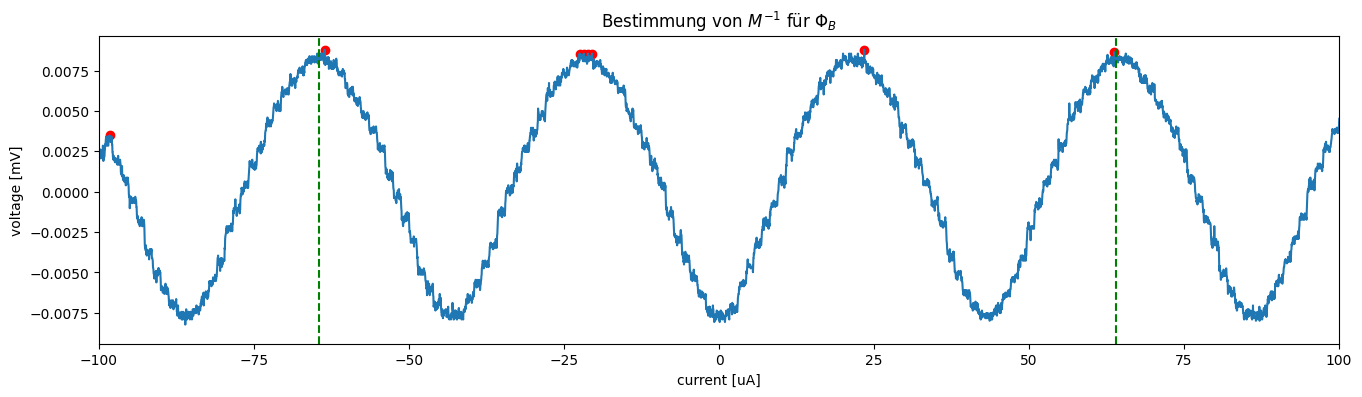

In [7]:
from scipy.signal import find_peaks
h =4.13567e-15   # eV s
phi0=h/2         # Vs  magnetic flux quantum

current_modified=[]
voltageB1_modified=[]
for i in range(len(current)):
    if current[i] <-25000 or current[i]>25000:
        continue
    current_modified.append(current[i])
    voltageB1_modified.append(voltage_B1[i])

current_modified=np.array(current_modified)
voltageB1_modified=np.array(voltageB1_modified)
# print(current_modified)
peaks, _ = find_peaks(voltageB1_modified, prominence=0.01, width=0.001)
#print(current_modified[peaks])

x_range=np.linspace(-0.1,0.1,1000)

plt.figure(figsize=(16,4))
for peak in peaks:
    plt.scatter(current_modified[peak], voltageB1_modified[peak],color='red')
plt.plot(current, voltage_B1,label='$\\Phi_B$')
plt.axvline(x=-64.5, color='green', linestyle='--')   # phi0 stellt die Breite der beiden grünen Linien dar
plt.axvline(x=64, color='green', linestyle='--')

dI=round(128.5/3,1)     #uA, 3 Perioden
#print(dV)
print('$M^-1=',dI,'+-',1.00, 'uAΦ0^-1')

plt.ylabel('voltage [mV]')
plt.xlabel('current [uA]')
plt.title('Bestimmung von $M^{-1}$ für $\\Phi_B$')

plt.xlim(-100,100)

$M^-1= 9.04 +- 1.0 uAΦ0^-1


(-100.0, 100.0)

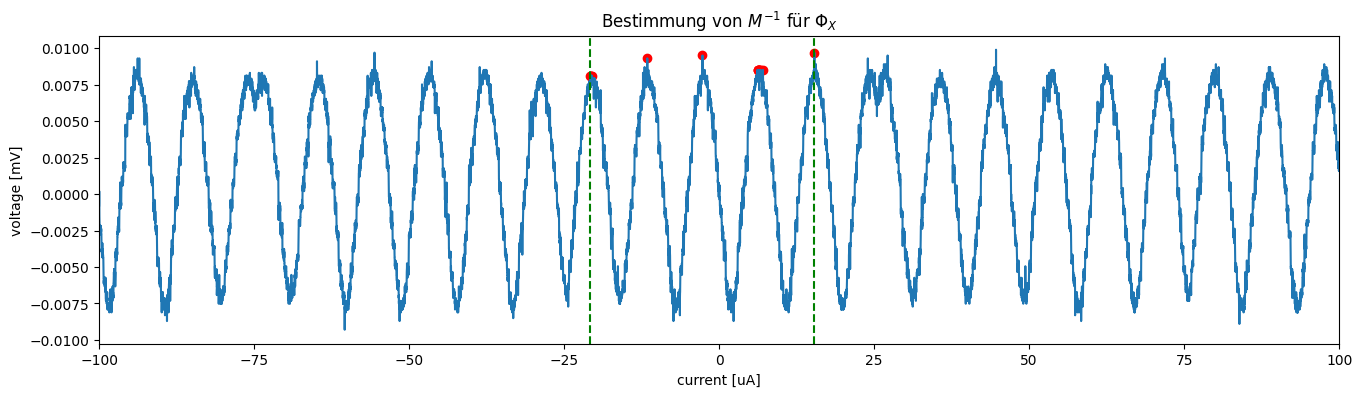

In [8]:
current_modified=[]
voltageB1_modified=[]
for i in range(len(current)):
    if current_phiX[i] <-25 or current_phiX[i]>25:
        continue
    current_modified.append(current_phiX[i])
    voltageB1_modified.append(voltage_B2[i])

current_modified=np.array(current_modified)
voltageB2_modified=np.array(voltageB1_modified)
# print(current_modified)
peaks, _ = find_peaks(voltageB2_modified, prominence=0.01, width=0.1)
#print(current_modified[peaks])

plt.figure(figsize=(16,4))
for peak in peaks:
    plt.scatter(current_modified[peak], voltageB2_modified[peak],color='red')
plt.plot(current_phiX, voltage_B2,label='$\\Phi_B$')
plt.axvline(x=-20.80538576, color='green', linestyle='--')   # phi0 stellt die Breite der beiden grünen Linien dar
plt.axvline(x=15.35395375 , color='green', linestyle='--')

dI=round((15.35395375+20.80538576)/4,2)  #uA, 4 Perioden
#print(dV)
print('$M^-1=',dI,'+-',1.00, 'uAΦ0^-1')

plt.ylabel('voltage [mV]')
plt.xlabel('current [uA]')
plt.title('Bestimmung von $M^{-1}$ für $\\Phi_X$')

plt.xlim(-100,100)

Wie wir sehen können, ist die Inverse der Magnetisierung von $\Phi_X$ deutlich kleiner im Vergleich zu der von $\Phi_B$. Der theoretische Wert ergibt sich aus dem Vorversuch, wo die Positionen der Maxima und Minima von $\Phi_X$ für mehrere Perioden aufgenommen wurden, es kommt also aus Mittelwertbetrachtung sowie mittleren sigma-Abweichung die Periode:
$$P=(9.03\pm 0.37)\;\mu A$$
Was $M^{-1}=(9.03\pm 0.37)\;\mu A\cdot \Phi_0^{-1}$ bedeutet, die nicht signifikant von dem experimentell bestimmtem Wert oben abweicht.

Mit der FLL Mode lässt sich die Periodität ausgleichen, indem wir die Formel: 
$$\Delta U_{out}=-R_F\frac{M_{In}}{M_{\Phi B}}\Delta I_{in}$$
benutzen. Der theoretische Verstärkungsfaktor ergibt sich:
$$A=R_F\frac{M_{In}}{M_{\Phi B}}=10^6\Omega \cdot \frac{9.04\; \mu A \Phi_0}{42.8\; \mu A \Phi_0}\approx 4734513.27\Omega \;\;(0.211\;V/\mu A)$$

### 2.2 Flux-Locked-Loop für Single-Stage

In dieser Aufgabe verwenden wir SQUID mit FLL-Mode, FLL (Flux-Locked_Loop) bietet eine Gegenkopplung um den Strom in der Schaltung zu kompensieren, und die Formel über die Beziehung zwischen Eingangsstrom und Ausgangsspannung ergibt sich
$$
\Delta U_{out} = R_F \cdot \frac{M_{in}}{M_{Phi}} \Delta I_{in} = A \cdot \Delta I_{in}.
$$
Wir plotten zunächst die Daten von Eingang sowie Ausgang in Diagramm und mit einer Gerade werden dann die Daten in bestimmtem Bereich gefittet. 

Verstärkung ohne Umrechnen= 2.145830697658258 , Standardfehler= 0.0003208628918488158


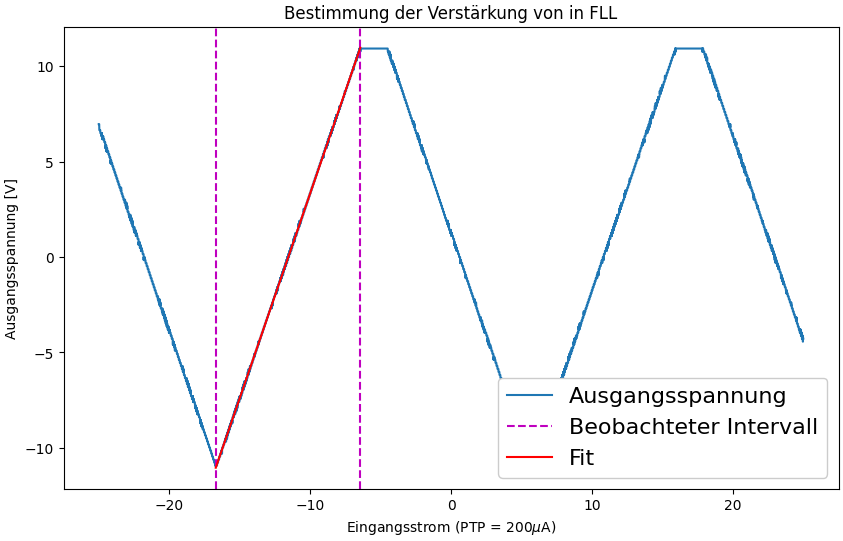

In [9]:
data_flux_locked=pd.read_csv('C:\\Users\\shiy0\\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\Flux_Loop_Single\\Flux_Loop_Single_1.csv', delimiter=';',usecols=[0,1,2], names=['time','input','output'], skiprows=3)

data_flux_locked['time'] = data_flux_locked['time'].str.replace(',', '.').astype(float)
data_flux_locked['input'] = data_flux_locked['input'].str.replace(',', '.').astype(float)
data_flux_locked['output'] = data_flux_locked['output'].str.replace(',', '.').astype(float)

time = pd.to_numeric(data_flux_locked['time'], errors='coerce')
input = pd.to_numeric(data_flux_locked['input'], errors='coerce')
output = pd.to_numeric(data_flux_locked['output'], errors='coerce')

plt.figure(figsize=(10,6))
plt.plot(time, output, label="Ausgangsspannung")
#plt.plot(time, input, label="Eingangsspannung", color = 'g')
plt.ylabel('Ausgangsspannung [V]')
plt.xlabel('Eingangsstrom (PTP = 200$\\mu$A)')

start_time = -16.7  
end_time = -6.43891166  

# Extract the data for the half-period
half_period_mask = (time >= start_time) & (time <= end_time)
time_half_period = time[half_period_mask]
output_half_period = output[half_period_mask]

# Highlight the half-period range
plt.axvline(x=start_time, color='m', linestyle='--', label='Beobachteter Intervall')
plt.axvline(x=end_time, color='m', linestyle='--')

def linear(x, a, b):
    return a*x + b
current_range = np.linspace(start_time,end_time,100)
popt, pcov=curve_fit(linear, time_half_period, output_half_period)
plt.plot(current_range,linear(current_range,*popt), label='Fit', color = 'r')
print("Verstärkung ohne Umrechnen=",popt[0],", Standardfehler=", np.sqrt(pcov[0][0]))

plt.title('Bestimmung der Verstärkung von in FLL')
plt.style.use(['science','notebook','grid'])
plt.legend(loc='best')

Die Verstärkung ist also berechnet als $A'=\frac{U_{total}}{N}$ mit der Anzahl der Kästchen $N$. Aus der Ausgangskurve wird deutlich, dass die Signale im FLL-Modus signifikant linearisiert werden können. In diesem Versuchsteil haben wir den Wert Peak-to-Peak mit 200 $\mu A$ gewählt. Die gefitteten Daten decken jedoch nicht den gesamten Bereich von den Minima bis zu den Zentren der Maxima ab. Daher betrachten wir die CSV-Datei genauer. Der Plateaubereich beginnt bei -6,43891166 und reicht bis -4,49535972. Die Länge des Plateaubereichs beträgt 1,944.

Daher ergibt sich die Länge der gefitteten Daten durch das Ratio von dem betrachteten Bereich in einer halben Periode zu (0,972 = 1,944 /2 is the half length of the flat line):

$$
I_{total} = 200\,\mu A \times \frac{16,7 - 6,44}{16,7 - 6,44 + 0,972} = 182,69\, \mu A.
$$

Die Einheit unserer ursprünglichen Verstärkung ist V/Kästchen. Nach dem Fitten und der entsprechenden Umrechnung ergibt sich die Verstärkung:

$$
A = \frac{U_{total}}{N}\frac{N}{I_{total}} = A'\frac{N}{I_{total}}= 2,156 \times \frac{16,7 - 6,44}{182,69}= 0,121\, V\mu A^{-1}. 
$$

Da die Fehler zu gering ist, können wir einfach vernachlässigen. Wir vergleichen jetzt den berechneten Wert mit dem zuvor theoretisch zu erwartenden Wert 0,1214V $\mu A^{-1}$, der relative Fehler dazwischen beträgt nur 0,3%, dies zeigt uns die Übereinstimmung zwischen diesen zwei Methoden.

### 2.3 SQUID Noise

Nun wird das Rauschenspektrum des SQUID im FLL-Modus gemessen. Dabei soll das Gain-Bandwidth-Produkt (GBP) verändert und dessen Einfluss auf das Spektrum beobachtet werden. Für die Messung wird der Spektrummodus verwendet, wobei die x- und y-Achse auf eine logarithmische Skala gesetzt werden, der Anzeigemodus auf "Average" eingestellt und die logarithmische Einheit in dBV dargestellt wird. Der optimale GBP Wert ohne Resonanz ist bei 7,20 GHz gefunden. Die Rauschkurve des gemessenen Widerstands zeigt eine Tiefpass-Charakteristik und die Position von Cutoff ist im Bild beobachtbar. 

## III Two-Stage SQUID Readout

Jetzt wird das Zwei-Stufen-SQUID-Readout betrachtet, und das Rauschen verringert und das Signal-Rausch-Verhältnis im Flux-Locked-Loop (FLL)-Schaltkreis erhöht. Eine Stromänderung $I_{IN}$ im Eingangswickel des Frontend-SQUIDs erzeugt eine Flussänderung $\Delta \Phi_1$, die den SQUID im Spannungsbetrieb arbeiten lässt. Diese Flussänderung bewirkt eine weitere Änderung im zweiten SQUID, einem SQUID-Array, dessen Ausgangsspannung $U_{OUT}$ durch Verstärkung und Integration bestimmt wird. Eine Unterabstimmung des ersten SQUIDs kann helfen, unterschiedliche Rauschpegel zu vermeiden, reduziert jedoch das Signal-Rausch-Verhältnis.

### 3.1 Two-Stage Messung der $V-\Phi$ Charakteristik in Open-Loop

Jetzt benutzen wir statt eines Single-SQUIDs die Schaltung eines Two-Stage-SQUIDs. Die $V-\Phi$ Charakteristik des Two-Stage-SQUIDs wurde zunächst im Programm beobachtet. Danach stellten wir die Ausgangssignale auf die maximale Schwingung ein, indem wir die Parameter des Arrays und der First-Stage jeweils änderten. Die Werte der Parameter für die maximale Schwingung sind wie folgt angegeben (Peak-to-Peak = 200 $\mu A$).

**Array (Phix als Quelle):**

$$
I_b = (10,0 \pm 0,3)\,\mu A \qquad V_b = 184,77\,\mu A
$$

**First-Stage (Phib als Quelle):**

$$
I = (16,9 \pm 0,5)\,\mu A \qquad \Phi_x = (14,2 \pm 0,5)\,\mu A
$$


<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\shiy0\AppData\Local\Temp\ipykernel_13780\1048959849.py:1: SyntaxWarning: invalid escape sequence '\O'
  data_array=pd.read_csv('C:\\Users\\shiy0\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\TwoStage_openloop_Array\\TwoStage_openloop_VPhi_1.csv', delimiter=';',usecols=[0,1,2], names=['time','input','output'], skiprows=3) # V-Phi von Array
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


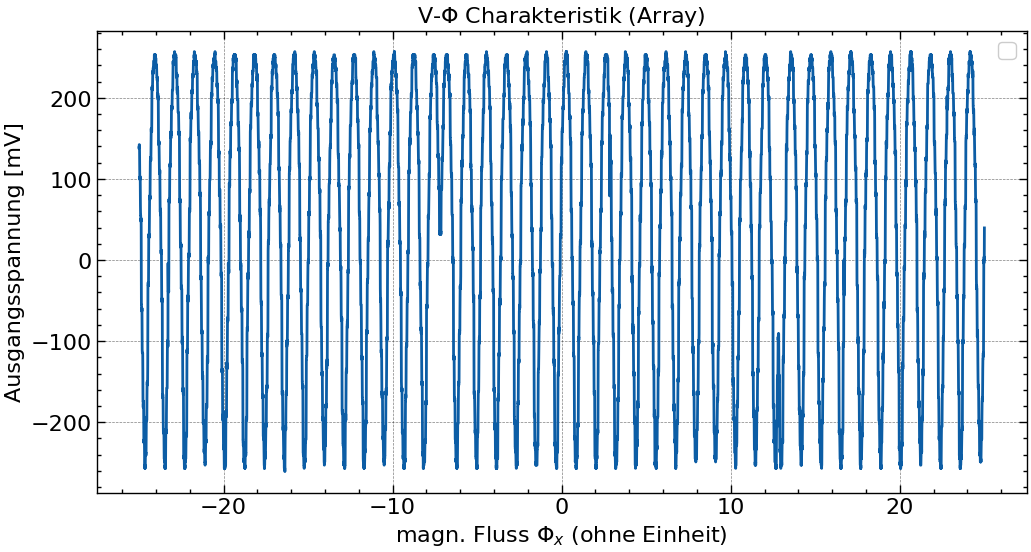

In [10]:
data_array=pd.read_csv('C:\\Users\\shiy0\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\TwoStage_openloop_Array\\TwoStage_openloop_VPhi_1.csv', delimiter=';',usecols=[0,1,2], names=['time','input','output'], skiprows=3) # V-Phi von Array

data_array['time'] = data_array['time'].str.replace(',', '.').astype(float)
data_array['input'] = data_array['input'].str.replace(',', '.').astype(float)
data_array['output'] = data_array['output'].str.replace(',', '.').astype(float)

time1 = pd.to_numeric(data_array['time'], errors='coerce')
input1 = pd.to_numeric(data_array['input'], errors='coerce')
output1 = pd.to_numeric(data_array['output'], errors='coerce')

plt.figure(figsize=(12,6))
plt.plot(time1, output1)
plt.ylabel('Ausgangsspannung [mV]')
plt.xlabel('magn. Fluss $\\Phi_x$ (ohne Einheit)')
plt.title('V-$\\Phi$ Charakteristik (Array)')  
plt.style.use(['science', 'notebook', 'grid'])
plt.legend()

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\shiy0\AppData\Local\Temp\ipykernel_13780\6223800.py:1: SyntaxWarning: invalid escape sequence '\O'
  data_first=pd.read_csv('C:\\Users\\shiy0\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\TwoStage_openloop_FirstStage\\TwoStage_openloop_FirstStage_1.csv', delimiter=';',usecols=[0,1,2], names=['time','input','output'], skiprows=3) # V-Phi von first-stage
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


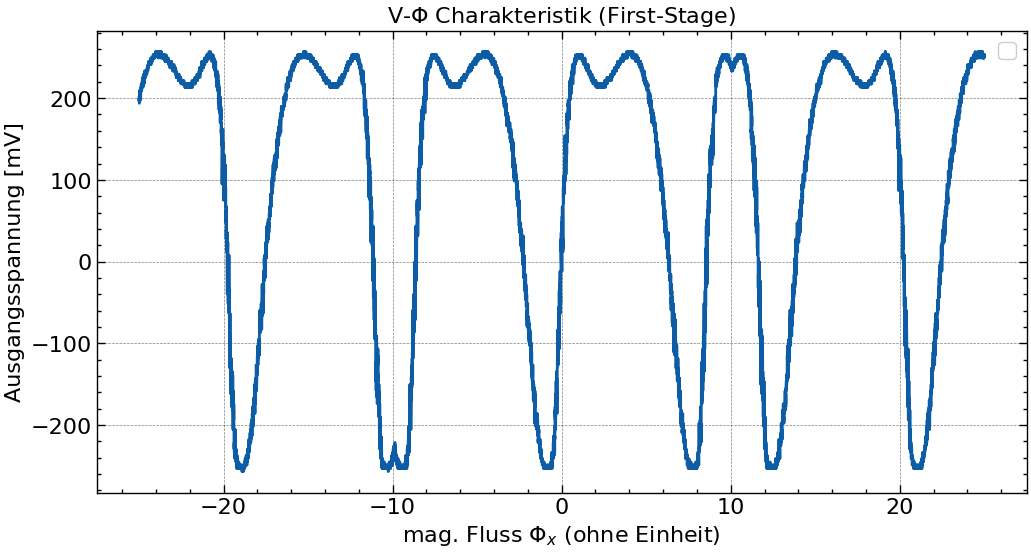

In [11]:
data_first=pd.read_csv('C:\\Users\\shiy0\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\TwoStage_openloop_FirstStage\\TwoStage_openloop_FirstStage_1.csv', delimiter=';',usecols=[0,1,2], names=['time','input','output'], skiprows=3) # V-Phi von first-stage

data_first['time'] = data_first['time'].str.replace(',', '.').astype(float)
data_first['input'] = data_first['input'].str.replace(',', '.').astype(float)
data_first['output'] = data_first['output'].str.replace(',', '.').astype(float)

time2 = pd.to_numeric(data_first['time'], errors='coerce')
input2 = pd.to_numeric(data_first['input'], errors='coerce')
output2 = pd.to_numeric(data_first['output'], errors='coerce')

plt.figure(figsize=(12,6))
plt.plot(time2, output2)
plt.ylabel('Ausgangsspannung [mV]')
plt.xlabel('mag. Fluss $\\Phi_x$ (ohne Einheit)')
plt.title('V-$\\Phi$ Charakteristik (First-Stage)')  
plt.style.use(['science', 'notebook', 'grid'])
plt.legend()

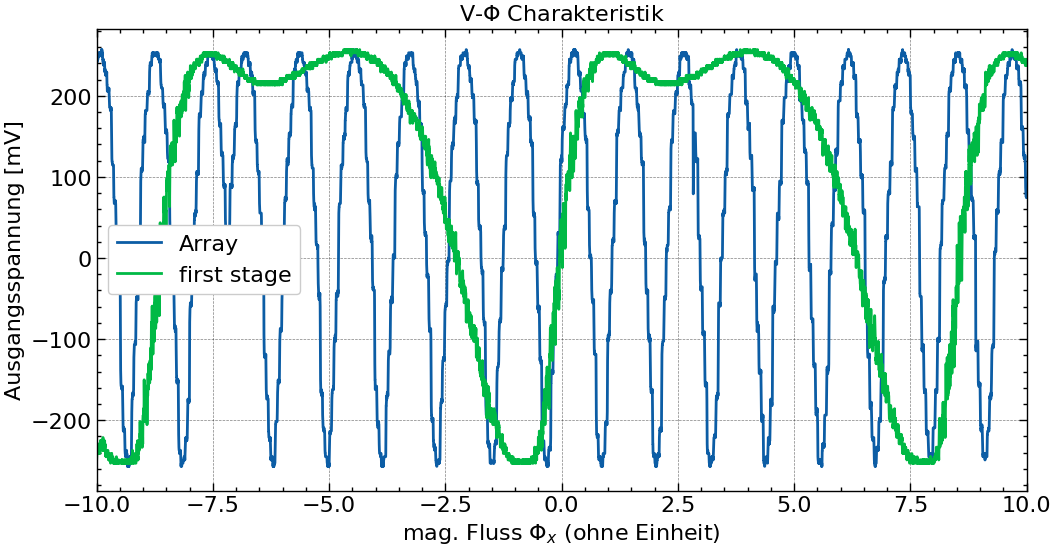

In [12]:
plt.figure(figsize=(12,6))
plt.plot(time1, output1, label='Array')
plt.plot(time2, output2, label='first stage')
plt.xlim(-10,10)
plt.ylabel('Ausgangsspannung [mV]')
plt.xlabel('mag. Fluss $\\Phi_x$ (ohne Einheit)')
plt.title('V-$\\Phi$ Charakteristik')  
plt.style.use(['science', 'notebook', 'grid'])
plt.legend()

Für die $V-\Phi$ Charakteristik konzentrieren wir uns hauptsächlich auf die grüne Linie, die offensichtlich ein periodisches Verhalten zeigt. Dies ist nachvollziehbar, da die Eingangssignale ebenfalls periodisch sind. Auffällig ist, dass für jede Wellenform ein kleiner "Dip" zu erkennen ist. Bei Änderungen der Werte von $I_{\Phi_x}$ lässt sich auch eine Veränderung der Höhen dieses Dips beobachten. Zudem weist die Wellenform eine Asymmetrie auf, die sich von einer symmetrischen Wellenform unterscheidet.

Der Dip in der $V-\Phi$ Charakteristik entsteht durch die Wechselwirkungen zwischen dem magnetischen Fluss und den quantenmechanischen Eigenschaften der SQUIDs. Diese Wechselwirkungen könnten vielleicht zu einer nichtlinearen Antwort führen, die sich als Dip in der Spannungskurve manifestiert.

Und für die Asymmetrie haben wir drei mögliche Gründe ausgedacht: einerseits kann sie auf unterschiedliche Kopplungen zwischen den SQUIDs und den externen Magnetfeldern zurückzuführen sein, was zu variierenden Resonanzeffekten führt. Auch möglich ist die Änderungen des Bias-Stroms beeinflussen die Betriebsbedingungen der SQUIDs und können eine asymmetrische Spannungsantwort hervorrufen. Nun könnte außerdem die magnetische Hysterese der SQUIDs ebenfalls Beitrag zur Asymmetrie in der $V-\Phi$ Charakteristik leisten.


### 3.2 Rauschspektrum und Temperaturmessung

Danach schalten wir die Generatoren aus und aktivieren den FLL-Modus, um das Frequenzspektrum von gemessenen Widerstand zu analysieren. Verschiedene Parameter wurden eingestellt, um die verschwindete Spannung über den Integrator zu erhalten, darunter $I_{\Phi_B} = -0,91\, \mu A$. Nach der Auswahl eines Gain-Bandwidth-Produkts (GBP) von 620 GHz konnten keine Resonanzen mehr festgestellt werden, und es zeigte sich eine charakteristische Tiefpass-Verhalten der Two-Stage-Konfiguration. Die beiden Cutoff-Punkte sind erkennbar, da die Verstärkung aus zwei Teilen besteht: einerseits durch das Rauschthermometer und andererseits durch den FLL-Kreis.

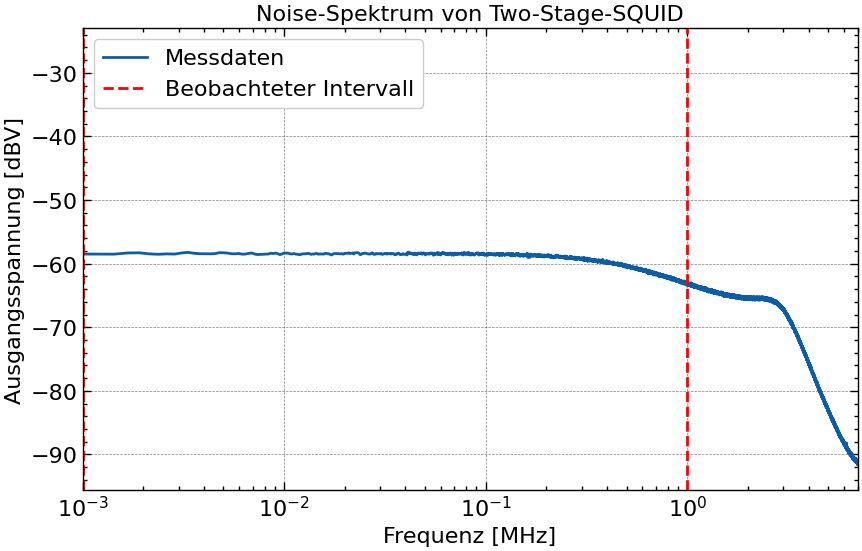

In [15]:
data_noise=pd.read_csv('C:\\Users\\shiy0\\OneDrive\\Dokumente\\FP\\F98 SQUIDs and Noise Thermometers\\Data\\Noise_TwoStage\\Noise_TwoStage_1.csv', delimiter=';',usecols=[0,1], names=['frequency','output'], skiprows=3) # V-Phi von First-Stage

data_noise['frequency'] = data_noise['frequency'].str.replace(',', '.').astype(float)
data_noise['output'] = data_noise['output'].str.replace(',', '.').astype(float)

frequency = pd.to_numeric(data_noise['frequency'], errors='coerce')
output = pd.to_numeric(data_noise['output'], errors='coerce')

plt.figure(figsize=(10,6))
plt.plot(frequency, output, label ='Messdaten')
plt.xscale('log')
plt.ylabel('Ausgangsspannung [dBV]')
plt.xlabel('Frequenz [MHz]')
plt.title('Noise-Spektrum von Two-Stage-SQUID')  
plt.style.use(['science', 'notebook', 'grid'])

start = 0.001
end = 1

# Extract the data for the half-period
mask = (frequency >= start) & (frequency <= end)
frequency_use = frequency[mask]
output_use = output[mask]

plt.axvline(start, color='r', linestyle='--', label='Beobachteter Intervall')
plt.axvline(end, color='r', linestyle='--')
plt.xlim(0.001,7)

plt.legend(loc='best')

### Temperaturmessung mit einem Rauschthermometer

Zur Bestimmung der Temperatur des Rauschthermometers wird die Spannung $U$ in dBV in die Rauschamplituden-Leistungsspektraldichte $\sqrt{S_U}$ in $V/\sqrt{\text{Hz}}$ umgerechnet. Die Temperatur kann auf zwei Arten bestimmt werden: Erstens durch Fitten der gemessenen Rauschleistungsdichte an die erwartete Form, was die Ermittlung von Temperatur $T$, Widerstand $R$ und Induktivität $L$ ermöglicht. Zweitens durch den Vergleich mit einer kalibrierten Rauschleistungsdichte, wobei die Temperatur aus der Formel

$$T = \frac{S(f)}{S_{\text{cal}}(f)} \cdot T_{\text{cal}}$$

berechnet wird.

Da es keine Kalibrierungsdaten vorliegen, wird die erste Methode verwendet. Hierzu wird die Verstärkung zur Umwandlung von $\sqrt{S_U}$ in die Rauschamplituden-Leistungsspektraldichte $\sqrt{S_I}$ genutzt

$$
\sqrt{S_I} = \sqrt{S_U} \cdot \frac{|I|}{|U|} = \sqrt{S_U} \cdot \frac{1}{A},
$$

wobei $A$ die zuvor bestimmte Verstärkung ist.

Anschließend erfolgt eine Anpassung der Quadratwurzel der Rauschleistungsdichte $S$ in $A^2 Hz^{-1}$ an $\sqrt{S_I}$

$$
S_I(f) = \frac{4k_B T}{R} \cdot \frac{1}{1 + \left(\frac{f}{f_c}\right)^2},
$$

um die Temperatur zu bestimmen, wobei von einer Induktivität der Eingangswicklung von 2,9 nH ausgegangen wird.

c:\Users\shiy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ermittelte Temperatur: 92.533 K ± 0.003 K
Ermittelter Widerstand: 0.013 Ohm ± 0.000 Ohm


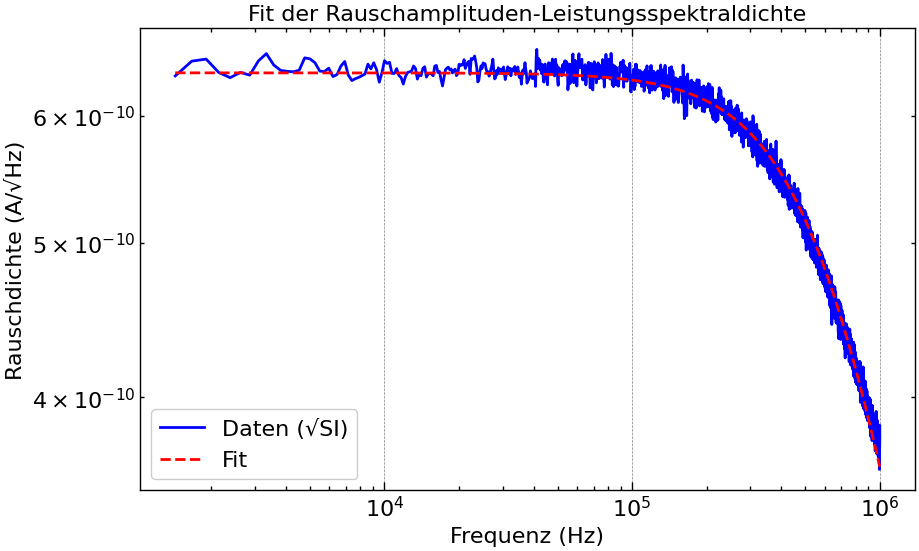

In [16]:
U_dBV = output_use[1:]  # Spannung in dBV
delta_f = np.diff(frequency_use) * 1e6  # Frequenzschritt in Hz (konvertiere MHz nach Hz)
L_input_coil = 2.9e-9  # Induktivität der Eingangswicklung in H
k_B = 1.381e-23  # Boltzmann-Konstante in J/K

# Umrechnung von U in dBV zu √SV in V/√Hz
sqrt_SV = 10**(U_dBV / 20) / np.sqrt(delta_f)

# Berechnung der Rauschamplituden-Leistungsspektraldichte des Stroms √SI in A/√Hz
K = 0.121e+6  # Verstärkung
sqrt_SI = sqrt_SV / K

# Fit der Quadratwurzel der Rauschleistungsdichte S in A² Hz⁻¹ zu √SI
def fit_function(f, T, R):
    return np.sqrt((4 * k_B * T / R) / (1 + (f**2 / (R / (2 * np.pi * L_input_coil))**2)))

# Frequenzen für den Fit (in Hz)
frequencies = frequency_use[1:] * 1e6  # Originalfrequenzen in MHz nach Hz konvertieren

# Fit der Daten
popt, pcov = curve_fit(fit_function, frequencies, sqrt_SI)
T_fit, R_fit = popt

# Ausgabe der ermittelten Temperatur
print(f"Ermittelte Temperatur: {T_fit:.3f} K ± {pcov[0][0]:.3f} K")
print(f"Ermittelter Widerstand: {R_fit:.3f} Ohm ± {pcov[1][1]:.3f} Ohm")

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(frequencies, sqrt_SI, 'b-', label='Daten (√SI)')
plt.plot(frequencies, fit_function(frequencies, T_fit, R_fit), 'r--', label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Rauschdichte (A/√Hz)')
plt.title('Fit der Rauschamplituden-Leistungsspektraldichte')
plt.style.use(['science', 'notebook', 'grid'])
plt.legend(loc='best')
plt.show()

Das Ergebnis ist eigentlich nicht zu erwarten da das gesamte SQUIDs-Loop bis 4.3K abgekühlt werden sollte. Eine mögliche Ursache dafür könnte die Wärmeproduktion von Arbeitsschaltung sein, abgesehen von den unvernachlässigbaren Widerständen im Dracht, Sensor oder ähnlichen elektrischen Bauteile, wie wir schon in Vorbereitung gemessen und diskutiert haben. Ein anderer Grund dafür sind Fluktuationen des magnetischen Flusses durch den SQUID-Loop wegen der störenden Radiation von elektrischen Geräten z.B. Laptop, Handy, die während des Experiments nicht notwendigerweise ausgeschaltet werden.